# Surface animations

Here we show how to make animations of surface plots.

First we need some imports:

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import animatplot as amp

Let's use: $z = \sin(x^2+y^2-t)$.

First, we generate the data.

In [2]:
x = np.linspace(-2, 2, 41)
y = np.linspace(-2, 2, 41)
t = np.linspace(0, 2*np.pi, 30)

X, Y, T = np.meshgrid(x, y, t)

data = np.sin(X*X+Y*Y-T)

We need to be careful here. Our time axis is the last axis of our data, but animatplot assumes it is the first axis by default. Fortunately, we can use the ```t_axis``` argument.

We need to create a special `Axes` object with a 3d projection to make surface animations. Here we do this by using `plt.subplots(subplot_kw={"projection": "3d"})`. In more complicated situations, you might need to pass an axes argument for various subplots, but here we only have one subplot, so we do not need to pass in the axes as animatplot can pick them up using `plt.gca()`.

<IPython.core.display.Javascript object>


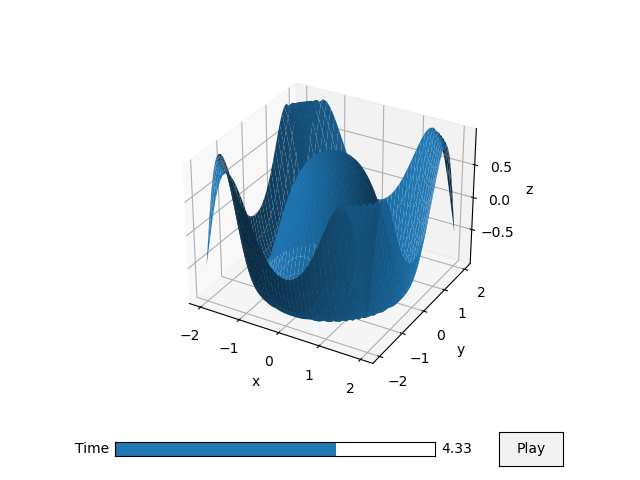

In [3]:
# standard matplotlib stuff
# create the different plotting axes
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# animatplot stuff
# now we make our block

block = amp.blocks.Surface(X[:,:,0], Y[:,:,0], data, t_axis=2)
timeline = amp.Timeline(t, fps=10)

# now to contruct the animation
anim = amp.Animation([block], timeline)
anim.controls()

anim.save_gif('images/surface')
plt.show()

There is a lot going on here so lets break it down.

Firstly, the ```standard matplotlib stuff``` is creating, and labeling all of our axes for our subplot. This is exactly how one might do a static, non-animated plot.

When we make the Surface block, we pass in the x, y data as 2D arrays (```X[:,:,0]``` and ```Y[:,:,0]```), and the z data as a 3D array. We also specifify that the time axis is the last axis of the data ```t_axis=2```.

To set the axis limits, you need to use `ax.set_xlim()`, `ax.set_ylim()` and `ax.set_zlim()`. The keywords ```vmin```, and ```vmax``` control the color scale if you pass a cmap argument.

The rest simply brings the block and the timeline together into an animation.